In [1]:
from lattice import *
from system import *
from plot import *
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Dimer Chain

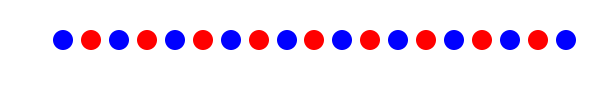

In [4]:
unit_cell = [{'tag': b'a', 'r0': (0, 0)}, 
             {'tag': b'b', 'r0': (1, 0)}]
prim_vec = [(2., 0.)]

lat = lattice(unit_cell=unit_cell, prim_vec=prim_vec)
sys = system(lat=lat)
plt = plot(sys=sys)

n1 = 10
lat.get_lattice(n1=n1)
lat.remove_sites([2*n1-1])
fig_lat = plt.lattice(ms=20, figsize=(10, 2))

In [5]:
sys.print_hopping(n=3)


18 different distances between sites:

Distances between sites:
1st hopping, length: 1.000
	with positive angles:
	 [ 0.0]
2nd hopping, length: 2.000
	with positive angles:
	 [ 0.0]
3rd hopping, length: 3.000
	with positive angles:
	 [ 0.0]


In [6]:
e_a, e_b = 0j, -1j
t_ab, t_ba = 2., 1.

In [7]:
sys.set_onsite({b'a': e_a, b'b': e_b})

In [8]:
sys.set_hopping([{'n': 1, 'tag': b'ab', 't': t_ab}, 
                 {'n': 1, 'tag': b'ba', 't': t_ba}])

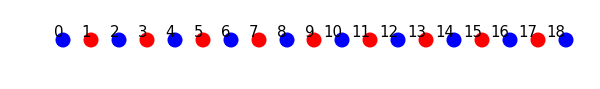

In [9]:
plt.lattice(ms=15, fs=15, figsize=(10, 2), plt_index=True);

In [10]:
sys.set_onsite_def({9: -2j, 10: 2j, 11: -2j})

In [11]:
sys.set_hopping_def({(0, 1): 2.5, (9, 10): 0.5, (10, 11): 0.5})

In [12]:
sys.change_hopping([{'n': 1, 'tag': b'ab', 't': t_ba}, 
                    {'n': 1, 'tag': b'ba', 't': t_ab}], 
                    x_bottom_left=10)

In [13]:
sys.set_onsite_dis(alpha=0.2+0.2j)

In [14]:
sys.set_hopping_dis(alpha=0.1+0.1j)

In [15]:
sys.get_coor_hop()

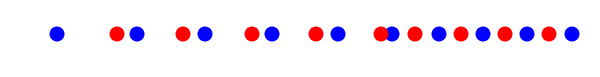

In [16]:
plt.lattice_hop(ms=15, figsize=(10, 2));

In [17]:
sys.get_ham()

In [18]:
sys.get_eig(eigenvec=True)

In [19]:
zero_mode = sys.get_intensity_pola_max(tag_pola=b'a')

State with polarization: 0.93575


In [20]:
intensity_neg = sys.get_intensity_en(lims=[-3, -1e-3])

9 states between -3 and -0.001


In [21]:
sys.get_ipr()

In [22]:
plt = plot(sys=sys)

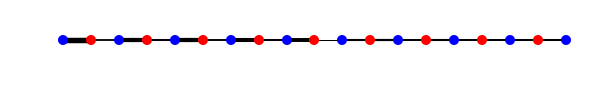

In [23]:
plt.lattice(ms=10, c=2, plt_hop=True, figsize=(10, 2));

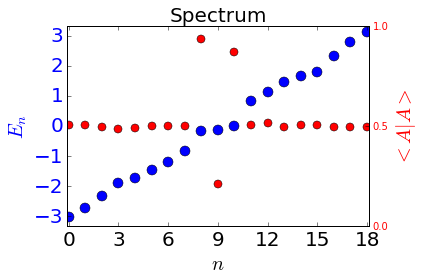

In [24]:
plt.spectrum(tag_pola=b'a');

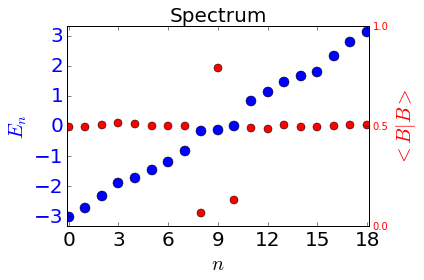

In [25]:
plt.spectrum(tag_pola=b'b');

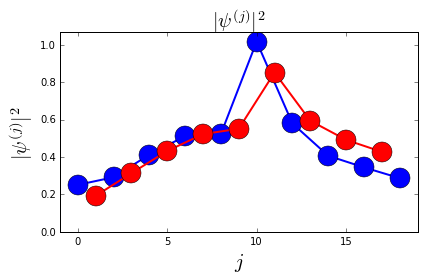

In [26]:
plt.intensity_1d(intensity_neg);

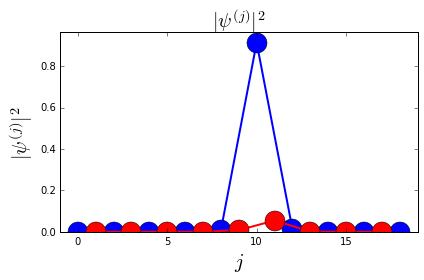

In [27]:
plt.intensity_1d(zero_mode);

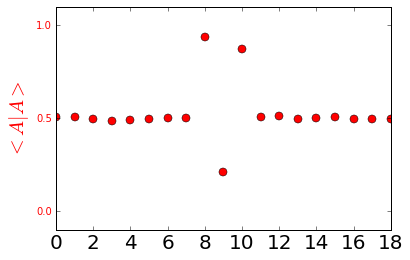

In [28]:
plt.plt_pola(tag_pola=b'a');

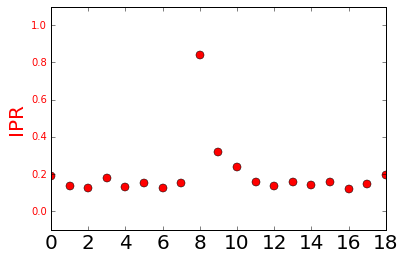

In [29]:
plt.plt_ipr();

## Chain of CROWs

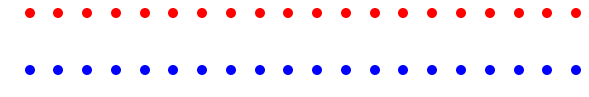

In [30]:
unit_cell = [{'tag': b'a', 'r0': (0, 0)}, 
             {'tag': b'b', 'r0': (0, 10)}]
prim_vec = [(5., 0.)]

lat = lattice(unit_cell=unit_cell, prim_vec=prim_vec)
sys = system(lat=lat)
plt = plot(sys=sys)
sav = save(dir_name='crows')

n1, n2 = 20, 1
lat.get_lattice(n1=n1, n2=n2)
fig_lat = lat.plot(ms=10, figsize=(10, 7))
sav.fig_lat(fig_lat, 'lattice')

In [31]:
sys.print_hopping(n=2)


38 different distances between sites:

Distances between sites:
1st hopping, length: 5.000
	with positive angles:
	 [ 0.0]
2nd hopping, length: 10.000
	with positive angles:
	 [ 0.0  90.0]


In [35]:
A, B, W = 4., 0., 1.
sys.clear_hopping()

In [36]:
sys.set_hopping([{'n': 2, 'ang': 90, 't': A}, 
                 {'n': 3, 't': W}])

In [37]:
sys.set_hopping_low([{'n': 2, 'ang': -90, 't': B}, 
                     {'n': 3, 't': W}])

In [38]:
sys.change_hopping([{'n': 2, 'ang': 90, 't': B}], 
                   x_bottom_left=50)
sys.change_hopping_low([{'n': 2, 'ang': -90, 't': A}], 
                       x_bottom_left=50)

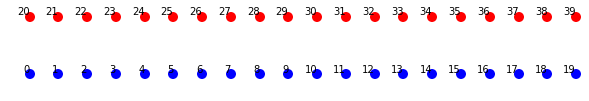

In [39]:
plt.lattice(plt_index=True, ms=10, fs=10, figsize=(10, 10));

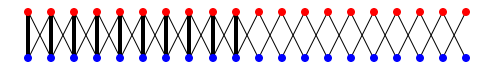

In [40]:
plt.lattice(plt_hop=True, ms=8, c=1, figsize=(8, 6));

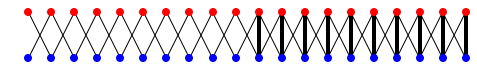

In [41]:
plt.lattice(plt_hop_low=True, ms=8, c=1, figsize=(8, 6));

In [42]:
sys.get_ham_full()

In [43]:
sys.get_eig(eigenvec=True)

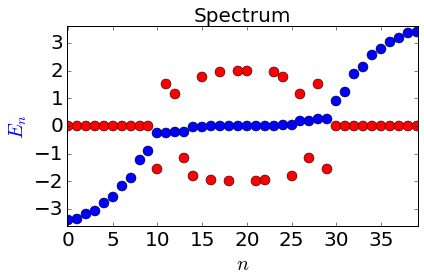

In [44]:
plt.spectrum_complex();

In [45]:
# check visually that: {en, en*, -en, -en*}
en = sys.en
print(en[np.abs(en.imag)>0.1])

[-0.25982010-1.53850603j -0.25982010+1.53850603j -0.20187254+1.14600218j
 -0.20187254-1.14600218j -0.04343219-1.79432109j -0.04343219+1.79432109j
 -0.00630144-1.95089547j -0.00630144+1.95089547j -0.00034383-1.99515373j
 -0.00034383+1.99515373j  0.00034383+1.99515373j  0.00034383-1.99515373j
  0.00630144-1.95089547j  0.00630144+1.95089547j  0.04343219+1.79432109j
  0.04343219-1.79432109j  0.20187254+1.14600218j  0.20187254-1.14600218j
  0.25982010+1.53850603j  0.25982010-1.53850603j]


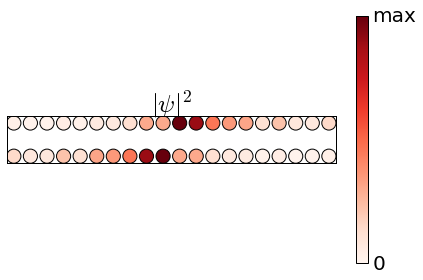

In [46]:
plt.intensity_disk(sys.intensity[:, 10]);

## Square Lattice

### nearest neighbour hoppings

In [49]:
unit_cell = [{'tag': b'a', 'r0': (0, 0)}]
prim_vec = [(1., 0.), (0., 1.)]
lat = lattice(unit_cell=unit_cell, prim_vec=prim_vec)
sys = system(lat=lat)
plt = plot(sys=sys)

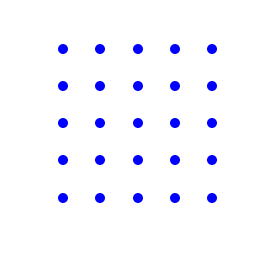

In [51]:
lat.get_lattice(n1=5, n2=5)
plt.lattice(ms=10);

In [52]:
sys.set_hopping([{'n': 1, 't': 1.}])

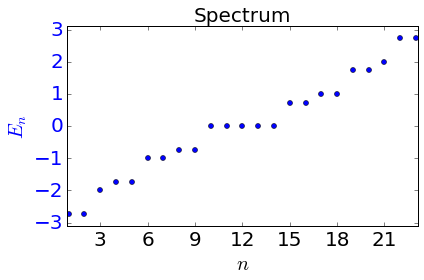

In [53]:
sys.get_ham()
sys.get_eig(eigenvec=True)
plt.spectrum(ms=5, lims=[-3, 3]);

5 states between -1e-05 and 1e-05


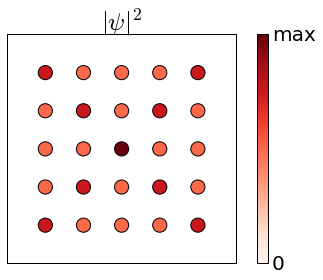

In [57]:
zero_modes = sys.get_intensity_en(lims=[-1e-5, 1e-5])
plt.intensity_disk(zero_modes, s=200);

### + next nearest neighbour hoppings

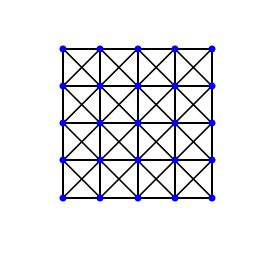

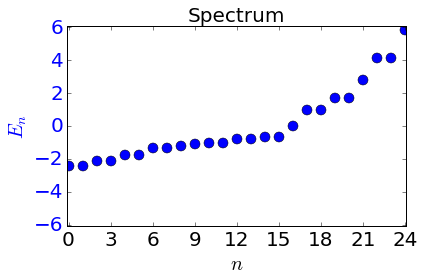

In [65]:
sys.set_hopping([{'n': 2, 't': 0.8}])
sys.get_ham()
sys.get_eig(eigenvec=True)
plt = plot(sys=sys)
plt.lattice(plt_hop=True, ms=7, c=2);
plt.spectrum();

1 states between -0.001 and 0.001


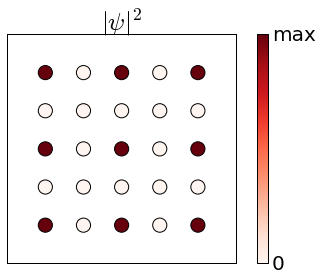

In [66]:
zero_mode = sys.get_intensity_en(lims=[-1e-3, 1e-3])
plt.intensity_disk(zero_mode, s=200);

### + next-next nearest neighbour hoppings

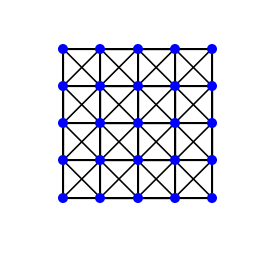

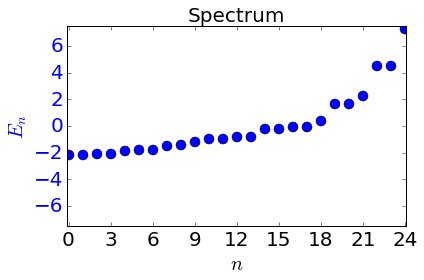

In [67]:
sys.set_hopping([{'n': 3, 't': 0.6}])
sys.get_ham()
sys.get_eig(eigenvec=True)
plt = plot(sys=sys)
plt.lattice(plt_hop=True, ms=10, c=2);
plt.spectrum();

In [68]:
zero_mode = sys.get_intensity_en(lims=[-1e-3, 1e-3])

0 states between -0.001 and 0.001


### + next-next-next nearest neighbour hoppings

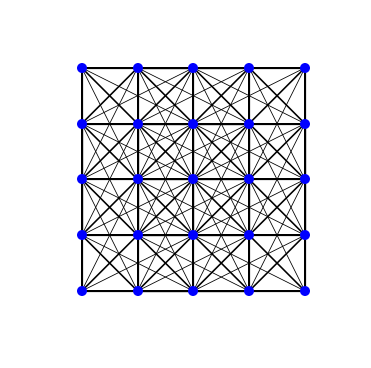

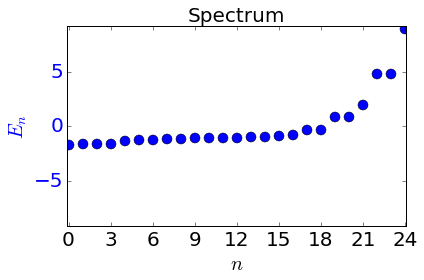

In [69]:
sys.set_hopping([{'n': 4, 't': 0.4}])
sys.get_ham()
sys.get_eig(eigenvec=True)
plt = plot(sys=sys)
plt.lattice(plt_hop=True, c=2., ms=10, figsize=(6, 6));
plt.spectrum();

In [70]:
zero_mode = sys.get_intensity_en(lims=[-1e-3, 1e-3])

0 states between -0.001 and 0.001


### Square Lattice with Chaotic Shape

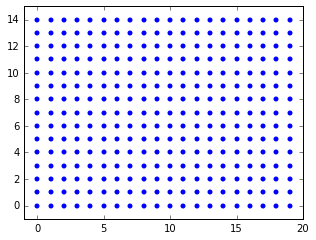

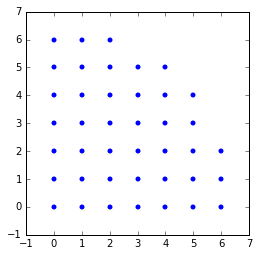

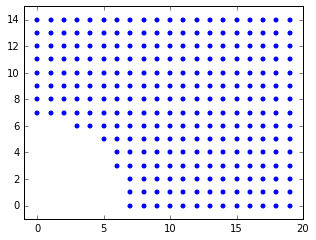

In [72]:
unit_cell = [{'tag': b'a', 'r0': (0, 0)}]
prim_vec = [(1., 0.), (0., 1.)]
lat1 = lattice(unit_cell=unit_cell, prim_vec=prim_vec)
sys1 = system(lat=lat1)
plt1 = plot(sys=sys1)

lat1.get_lattice(n1=20, n2=15)
plt1.lattice(ms=5, axis=True);

lat2 = lattice(unit_cell=unit_cell, prim_vec=prim_vec)
sys2 = system(lat=lat2)
plt2 = plot(sys=sys2)

lat2.get_lattice(n1=7, n2=7)
lat2.ellipse_in(a=6.5, b=6.5)
plt2.lattice(ms=5, axis=True);

lat = lat1 - lat2
sys = system(lat=lat)
plt = plot(sys=sys)
plt.lattice(ms=5, axis=True);


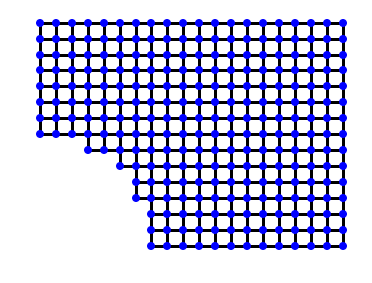

In [73]:
sys.set_hopping([{'n': 1, 't': 1.}])
sys.get_ham()
sys.get_eig(eigenvec=True)
plt.lattice(plt_hop=True, figsize=(6, 6), ms=8);

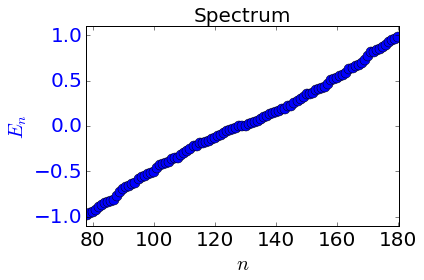

In [74]:
plt.spectrum(lims=[-1, 1]);

In [75]:
flat_band = sys.get_intensity_en(lims=[-.001, .001])

3 states between -0.001 and 0.001


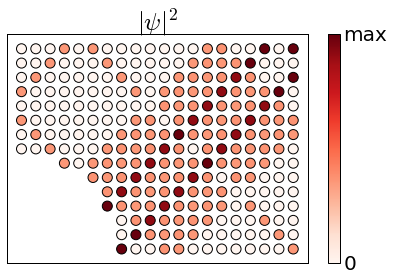

In [76]:
plt.intensity_disk(flat_band, s=100);

### Lieb Lattice

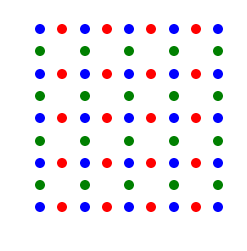

In [77]:
unit_cell = [{'tag': b'a', 'r0': (0, 0)},
             {'tag': b'b', 'r0': (1, 0)},
             {'tag': b'c', 'r0': (0, 1)}]
prim_vec = [(2., 0.), (0., 2.)]
lat = lattice(unit_cell=unit_cell, prim_vec=prim_vec)
sys = system(lat=lat)
plt = plot(sys=sys)

n1, n2 = 5, 5
lat.get_lattice(n1=n1, n2=n2)
lat.remove_dangling()
plt.lattice(ms=10);

In [78]:
sys.print_hopping(n=2)


41 different distances between sites:

Distances between sites:
1st hopping, length: 1.000
	with positive angles:
	 [ 0.0  90.0]
2nd hopping, length: 1.414
	with positive angles:
	 [ 45.0  135.0]


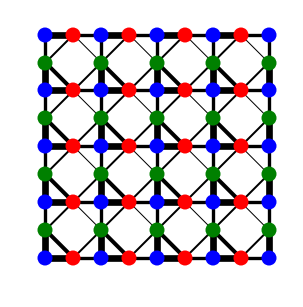

In [79]:
t_ab, t_ba = 4/3., 2/3.
t_ac, t_ca = 4/3., 2/3.
sys.set_hopping([{'n': 1, 'tag': b'ab', 't': t_ab},
                 {'n': 1, 'tag': b'ba', 't': t_ba},
                 {'n': 1, 'tag': b'ac', 't': t_ac},
                 {'n': 1, 'tag': b'ca', 't': t_ca}])
t_mp, t_pp, t_mm, t_pm = 0.8, 0.4, 0.4, 0.2
sys.set_hopping([{'n': 2, 'ang': 45, 'tag': b'bc', 't': t_pp},
                 {'n': 2, 'ang': 135, 'tag': b'bc', 't': t_mp},
                 {'n': 2, 'ang': 135, 'tag': b'cb', 't': t_pm},
                 {'n': 2, 'ang': 45, 'tag': b'cb', 't': t_mm}])
plt.lattice(plt_hop=True, ms=15, c=5, figsize=(5,5));

### Dimerization defect along x

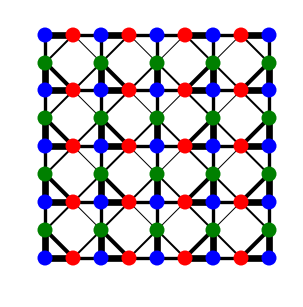

In [80]:
list_hop = [{'n': 1, 'tag': b'ab', 't': t_ba},
            {'n': 1, 'tag': b'ba', 't': t_ab},
            {'n': 2, 'ang': 45, 'tag': b'bc', 't': t_mp},
            {'n': 2, 'ang': 135, 'tag': b'bc', 't': t_pp},
            {'n': 2, 'ang': 135, 'tag': b'cb', 't': t_mm},
            {'n': 2, 'ang': 45, 'tag': b'cb', 't': t_pm}]
sys.change_hopping(list_hop=list_hop, x_bottom_left=4.)
plt.lattice(plt_hop=True, ms=15, c=5, figsize=(5,5));

### Dimerization defect along y

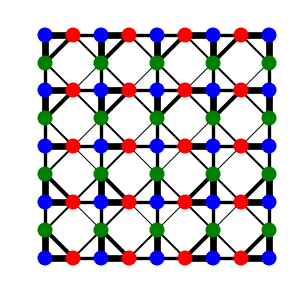

In [81]:
list_hop = [{'n': 1, 'tag': b'ac', 't': t_ca},
            {'n': 1, 'tag': b'ca', 't': t_ac},
            {'n': 2, 'ang': 45, 'tag': b'bc', 't': t_pm},
            {'n': 2, 'ang': 135, 'tag': b'bc', 't': t_mm},
            {'n': 2, 'ang': 135, 'tag': b'cb', 't': t_pp},
            {'n': 2, 'ang': 45, 'tag': b'cb', 't': t_mp}]
sys.change_hopping(list_hop=list_hop, y_bottom_left=4)
plt.lattice(plt_hop=True, ms=15, c=5, figsize=(5,5));

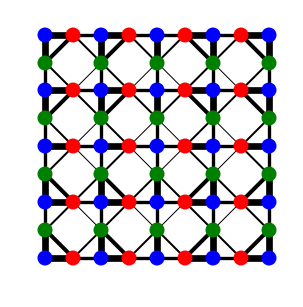

In [82]:
list_hop = [{'n': 2, 'ang': 45, 'tag': b'bc', 't': t_pp},
            {'n': 2, 'ang': 135, 'tag': b'bc', 't': t_pm},
            {'n': 2, 'ang': 135, 'tag': b'cb', 't': t_mp},
            {'n': 2, 'ang': 45, 'tag': b'cb', 't': t_pp}]
sys.change_hopping(list_hop=list_hop, x_bottom_left=4, y_bottom_left=4)
plt.lattice(plt_hop=True, ms=15, c=5, figsize=(5,5));

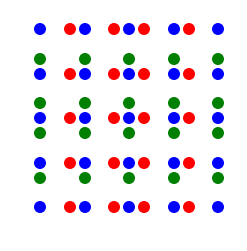

In [83]:
sys.get_coor_hop()
plt.lattice_hop(ms=12);

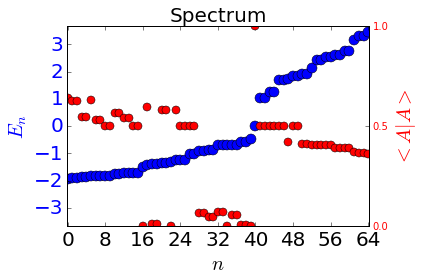

In [84]:
sys.get_ham()
sys.get_eig(eigenvec=True)
plt.spectrum(tag_pola=b'a');

State with polarization: 1.00000


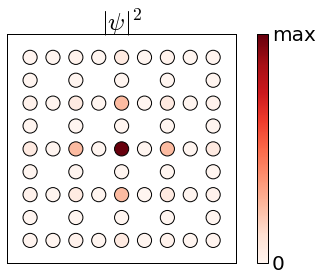

In [85]:
zero_mode = sys.get_intensity_pola_max(tag_pola=b'a')
plt.intensity_disk(zero_mode);

## Graphene

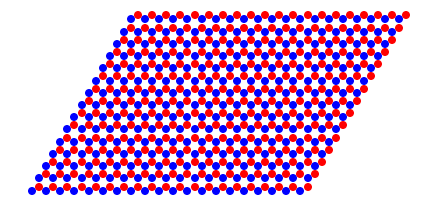

In [87]:
from math import sqrt
unit_cell = [{'tag': b'a', 'r0': (0., 0.)}, 
             {'tag': b'b', 'r0': (0.5*sqrt(3), 0.5)}]
prim_vec = [(sqrt(3), 0.), 
            (cos(PI/3)*sqrt(3), sin(PI/3)*sqrt(3))]

lat = lattice(unit_cell=unit_cell, prim_vec=prim_vec)
sys = system(lat=lat)
plt = plot(sys=sys)
sav = save(dir_name='graphene')

n1, n2 = 20, 15
lat.get_lattice(n1=n1, n2=n2)
fig_lat_ind = plt.lattice(ms=8, fs=15, figsize=(7, 4))
sav.fig_lat(fig_lat_ind, 'lattice_n'+str(lat.sites))

In [88]:
sys.print_hopping(n=1)


484 different distances between sites:

Distances between sites:
1st hopping, length: 1.000
	with positive angles:
	 [ 30.0  90.0  150.0]


In [89]:
sys.set_hopping([{'n': 1, 'ang': 30, 't': 1.},
                 {'n': 1, 'ang': 150, 't': 1.},
                 {'n': 1, 'ang': 90, 't': 1.}])

In [90]:
sys.get_coor_hop();

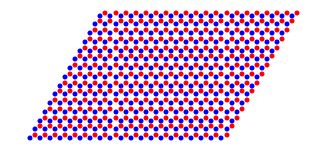

In [91]:
plt.lattice_hop(ms=5);

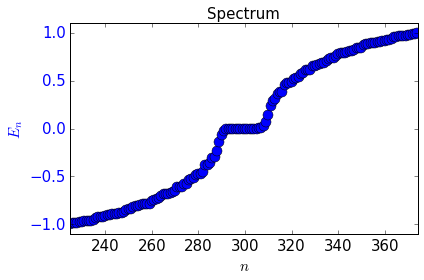

In [92]:
sys.get_ham()
sys.get_eig()
plt.spectrum(fs=15, lims=[-1., 1.]);

In [93]:
sys.set_hopping([{'n': 1, 'ang': 30, 't': 1.},
                 {'n': 1, 'ang': 150, 't': 1.},
                 {'n': 1, 'ang': 90, 't': 2.}])

In [94]:
sys.get_coor_hop();

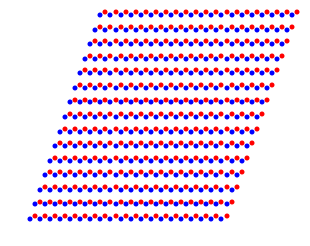

In [95]:
plt.lattice_hop(ms=5);

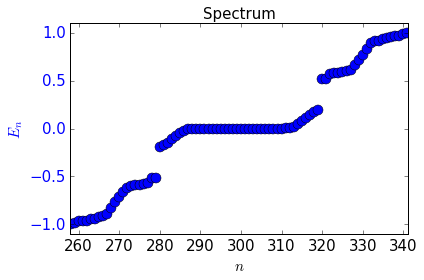

In [96]:
sys.get_ham()
sys.get_eig(eigenvec=True)
plt.spectrum(fs=15, lims=[-1., 1.]);

In [97]:
flat_band = sys.get_intensity_en(lims=[-0.5, 0.5])

40 states between -0.5 and 0.5


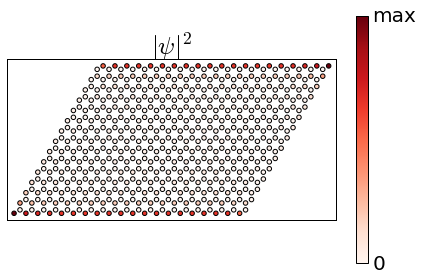

In [98]:
plt.intensity_disk(flat_band, s=20);

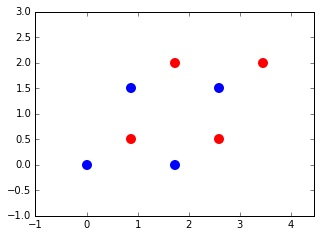

In [34]:
from math import sqrt
unit_cell = [{'tag': b'a', 'r0': [0, 0]}, 
             {'tag': b'b', 'r0': [0.5*sqrt(3), 0.5]}]
prim_vec = {'norm': sqrt(3), 'angle': 60}

lat = lattice(unit_cell=unit_cell, prim_vec=prim_vec)
sys = system(lat=lat)
plt = plot(sys=sys)
n1, n2 = 2, 2
lat.get_lattice(n1=n1, n2=n2)
lat.plot(ms=10, axis=True);

In [39]:
sys.set_hopping([{'n': 1, 't': 1.}])